#### Importando bibliotecas

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("temperatura_global_anual.csv", sep=';')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


#### Tratando de valores nulos e duplicatas:

In [24]:
df = df.dropna()
df = df.drop_duplicates()

print("Dados limpos com sucesso!")

Dados limpos com sucesso!


#### Corrigindo erros de formatação/interpretação: 

In [25]:
correcoes = {
    173: 1.1003,  # gcag 2023
    174: 1.1755,  # gcag 2024
    311: 1.0133,  # GISTEMP 2016
    315: 1.0092,  # GISTEMP 2020
    318: 1.1692   # GISTEMP 2023
}

for linha, valor_correto in correcoes.items():
    df.at[linha, 'Mean'] = valor_correto

print("Arquivo corrigido salvo com sucesso!")

Arquivo corrigido salvo com sucesso!


# **Explorando os valores da coluna "Mean"**

In [26]:
print(df['Mean'].describe())

count    319.000000
mean      -0.005916
std        0.390029
min       -0.597500
25%       -0.296200
50%       -0.106700
75%        0.183350
max        1.175500
Name: Mean, dtype: float64


**O que obtemos com essas informações?**
* A anomalia média é **-0.0059**, indicando que, ao longo dos anos, a temperatura global ficou ligeiramente abaixo da média histórica.
* O valor **0.39** mostra que há uma variação considerável nos dados, sugerindo flutuações na temperatura.
* O menor valor foi **-0.5975** (anos mais frios) e o maior valor foi **1.1755** (anos mais quentes).

# **Visualizar a distribuição dos dados**
Para confirmar se os dados seguem uma distribuição normal ou têm um viés positivo:

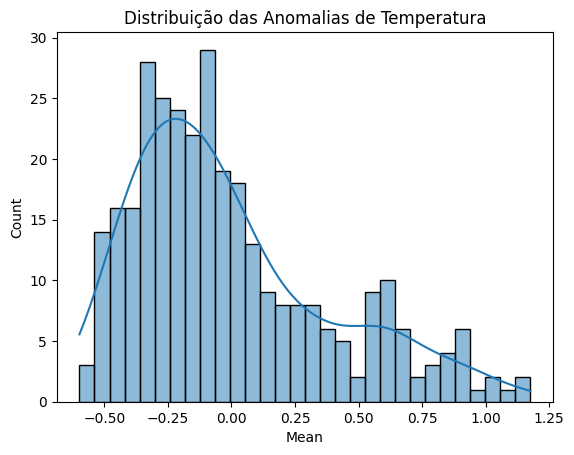

In [27]:
sns.histplot(df['Mean'], bins=30, kde=True)
plt.title("Distribuição das Anomalias de Temperatura")
plt.show()

**Assimetria à direita (Distribuição enviesada positivamente)**

A maioria dos valores está concentrada entre -0.5 e 0.25.
Há uma cauda longa à direita, indicando que nos anos mais recentes houve valores de anomalia mais altos (temperaturas mais quentes).

**Evidência de Aquecimento Global?**

Como há poucos valores muito negativos, isso sugere que anos extremamente frios são raros.
Já valores altos (acima de 0.5) aumentaram nos últimos tempos.

# **Identificação de Picos de Anomalia**
Podemos destacar anos que tiveram as maiores variações de temperatura.

In [28]:
top_anomalias = df.nlargest(10, 'Mean')
print(top_anomalias)

      Source  Year    Mean
174     gcag  2024  1.1755
318  GISTEMP  2023  1.1692
173     gcag  2023  1.1003
311  GISTEMP  2016  1.0133
315  GISTEMP  2020  1.0092
314  GISTEMP  2019  0.9758
166     gcag  2016  0.9329
170     gcag  2020  0.9229
312  GISTEMP  2017  0.9200
310  GISTEMP  2015  0.8975


Para visualizar graficamente:

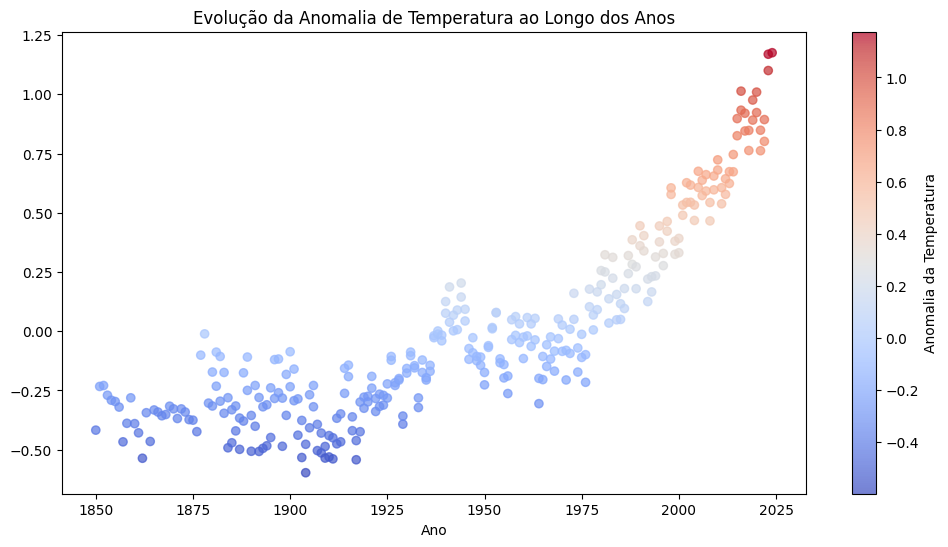

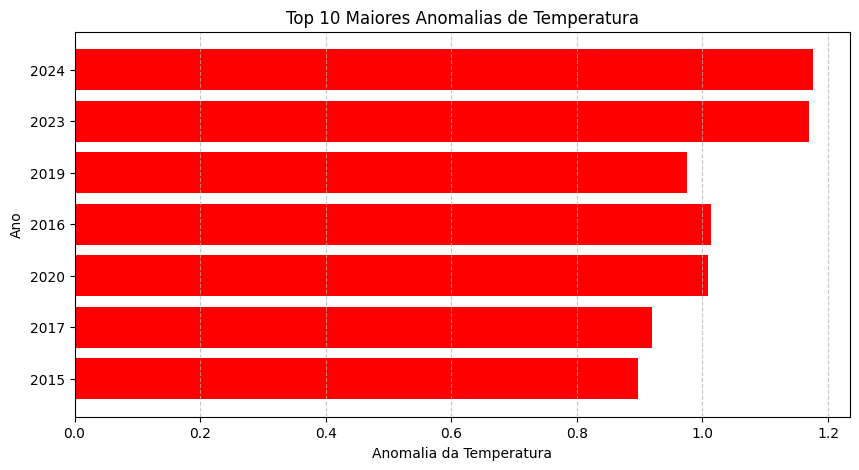

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(df['Year'], df['Mean'], label='Anomalias', c=df['Mean'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Anomalia da Temperatura')
plt.xlabel('Ano')
plt.title('Evolução da Anomalia de Temperatura ao Longo dos Anos')
top_anomalias = top_anomalias.sort_values(by='Mean', ascending=True)
plt.figure(figsize=(10,5))
plt.barh(top_anomalias['Year'].astype(str), top_anomalias['Mean'], color='red')
plt.xlabel('Anomalia da Temperatura')
plt.ylabel('Ano')
plt.title('Top 10 Maiores Anomalias de Temperatura')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

O primeiro gráfico é um **gráfico de dispersão** que mostra a **evolução das anomalias de temperatura ao longo dos anos**. As cores dos pontos indicam a intensidade da anomalia, com um mapa de cores coolwarm, e uma barra de cores é adicionada para mostrar a escala de temperatura. O segundo gráfico é um **gráfico de barras horizontal** que exibe os **10 anos com as maiores anomalias de temperatura**, destacando as maiores variações.

# **Média das Anomalias de Temperatura por Década**

Agrupando os dados por década, calculamos a média e criamos um gráfico de barras para visualizar a tendência das mudanças de temperatura ao longo do tempo:

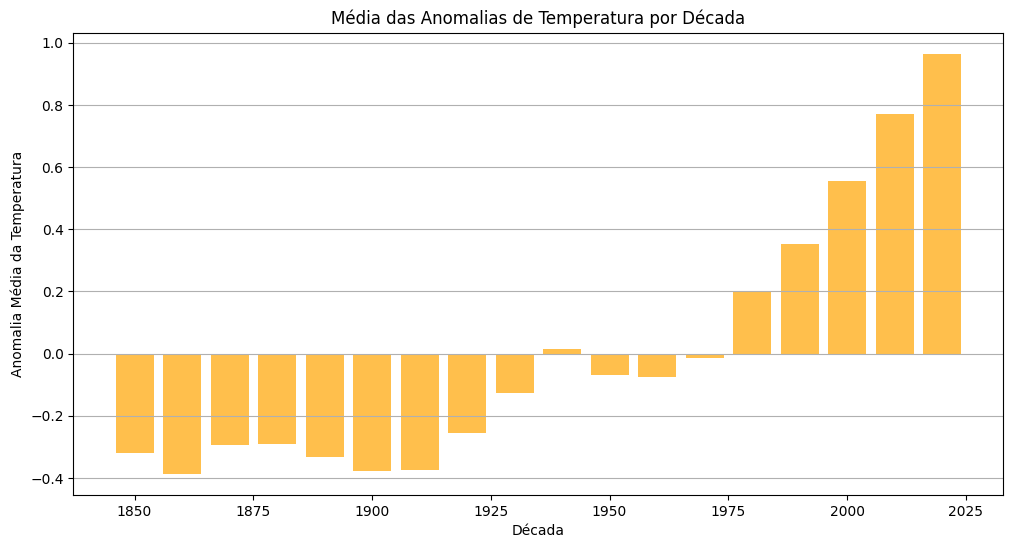

In [30]:
df['Decade'] = (df['Year'] // 10) * 10  # Criar coluna de década
decade_mean = df.groupby('Decade')['Mean'].mean()

plt.figure(figsize=(12,6))
plt.bar(decade_mean.index, decade_mean, width=8, color='orange', alpha=0.7)
plt.xlabel("Década")
plt.ylabel("Anomalia Média da Temperatura")
plt.title("Média das Anomalias de Temperatura por Década")
plt.grid(axis='y')
plt.show()

# **Conclusão**
Ao observar as **top 10 maiores anomalias de temperatura** para os anos 2015, 2017, 2020, 2016, 2019, 2023 e 2024, fica claro que o período recente tem sido caracterizado por um aumento significativo das variações térmicas. Esses anos representam picos de anomalias de temperatura em comparação com os valores históricos, sugerindo um padrão crescente de aquecimento global ou mudanças climáticas extremas. Esse comportamento pode estar relacionado com fenômenos como El Niño ou outras variações naturais e antropogênicas que afetam o clima global.

A análise dessas anomalias ao longo do tempo permite identificar uma tendência de **aquecimento global mais acentuado** nos últimos anos, com os valores de temperatura excedendo as médias históricas de forma mais frequente. Além disso, anos como 2023 e 2024 indicam que as anomalias extremas podem estar se tornando mais comuns, reforçando a necessidade de monitoramento contínuo e de políticas públicas para mitigar os impactos das mudanças climáticas.

# **Sugestões para Análise Avançada**

**1. Análise de Causas e Correlação com Fenômenos Climáticos:**

  * Considerando que os anos mais recentes (2015, 2017, 2020, 2016, 2019, 2023, e 2024) são destacados por anomalias extremas, seria interessante investigar a **relação dessas anomalias com fenômenos climáticos globais**, como **El Niño** e **La Niña**, que podem ter influenciado essas variações de temperatura.

  * Analisar a **intensidade e frequência de eventos extremos** (como ondas de calor) nesses anos pode fornecer uma visão mais clara dos impactos diretos dessas anomalias.

**2. Modelagem de Cenários Futuros:**

  * Utilizar **modelos preditivos de aprendizado de máquina** para estimar quais anos podem apresentar anomalias semelhantes às de 2023 e 2024, com base em dados históricos.

  * Avaliar a relação entre **ações humanas** (como emissões de CO2, mudanças no uso da terra, etc.) e o aumento das anomalias de temperatura pode fornecer insights para políticas de mitigação.

**3. Análise de Impactos Regionais:**

  * Se os dados contivessem informações regionais, seria útil aplicar **análise espacial** para observar como as anomalias de temperatura variam em diferentes partes do mundo, especialmente considerando que anos com anomalias extremas podem afetar algumas regiões de forma mais intensa do que outras.

  * Criar **mapas de calor** ou **gráficos de dispersão geoespacial** para visualizar essas variações espaciais e entender onde os impactos das anomalias são mais pronunciados.

# **Referência**
*NASA Goddard Institute for Space Studies (GISS). (n.d.). GISS Surface Temperature Analysis (GISTEMP). Retrieved March 12, 2025, from https://data.giss.nasa.gov/gistemp/*